# Clasificación del Conjunto de Datos del Iris con Árboles de Decisión

**Oliver Cuate**

*29 de noviembre de 2022*

## Cargamos las bibliotecas que usaremos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine  # cargar el conjuntos de datos del Iris
from sklearn.metrics import accuracy_score  # evaluar la calidad del modelo
from sklearn.model_selection import train_test_split  # dividir en conjuntos de prueba y entrenamiento
from sklearn.tree import DecisionTreeClassifier # árbol de decisión
from sklearn.tree import export_graphviz        # crear un archivo .dot
import graphviz     # hacer la gráfica de un archivo .dot
import matplotlib.pyplot as plt

## Carga los datos y dividir en entrenamiento y prueba

In [ ]:
datos = load_wine()

X = datos.data
y = datos.target

print('Tamaño de X: ', X.shape )
print('Tamaño de y: ', y.shape )


# Dividimos en conjuntos
X_train, X_test, y_train, y_test = train_test_split(X,y)

print('Tamaño del conjunto de entrenamiento: ', y_train.shape )
print('Tamaño del conjunto de prueba: ', y_test.shape )


Tamaño de X:  (178, 13)
Tamaño de y:  (178,)
Tamaño del conjunto de entrenamiento:  (133,)
Tamaño del conjunto de prueba:  (45,)


## Aplicamos el método de árbol de decisión

In [ ]:
 # creando el objeto 'arbol' de la clase DecisionTreeClassifier
 # con parámetros por defecto
arbol = DecisionTreeClassifier()

# Se hace el ajuste con el conjunto de entrenamiento
arbol.fit(X_train,y_train)

DecisionTreeClassifier()

## Evaluar la calidad del modelo

In [ ]:
y_pred = arbol.predict(X_test)  # hacemos la predicción con el conjunto de prueba

# Evaluamos la precisión con cada conjunto
print("Precisión del entrenamiento:",accuracy_score(y_true = y_train, y_pred=arbol.predict(X_train)))
print("Precisión de la prueba:",accuracy_score(y_true = y_test, y_pred=y_pred))

Precisión del entrenamiento: 1.0
Precisión de la prueba: 0.9333333333333333


## Representación gráfica del modelo

In [ ]:
# exportar el modelo a un archivo .dot
export_graphviz(arbol, out_file='grafica_arbol.dot', class_names=datos.target_names, feature_names=datos.feature_names, impurity=False, filled=True)

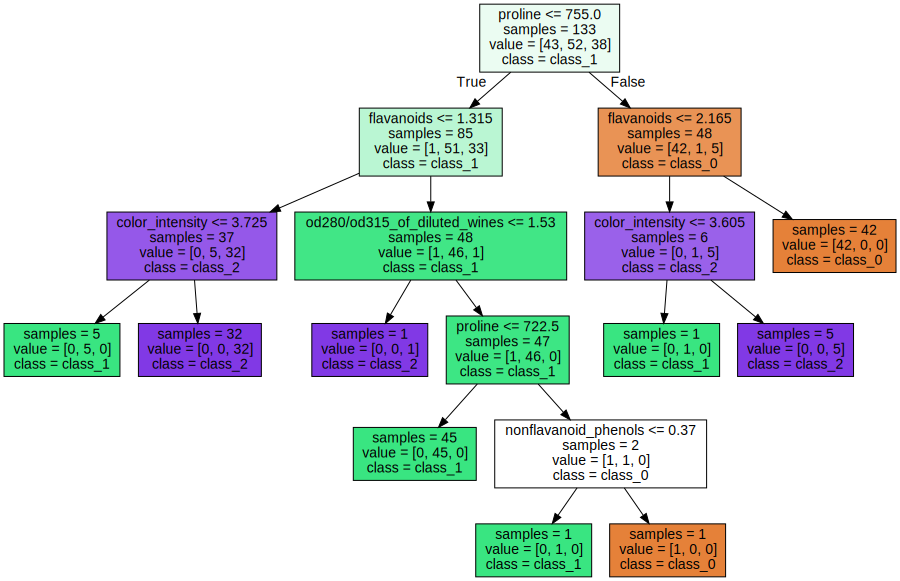

In [ ]:
with open('grafica_arbol.dot') as f:
  grafica = f.read()

graphviz.Source(grafica)

## Importancia de cada caracteristica

[]

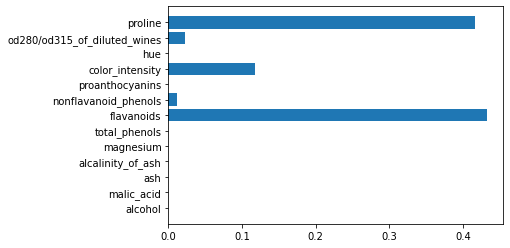

In [ ]:
caracteristicas = datos.data.shape[1]
plt.barh( range(caracteristicas), arbol.feature_importances_ )
plt.yticks( np.arange(caracteristicas), datos.feature_names )
plt.plot()

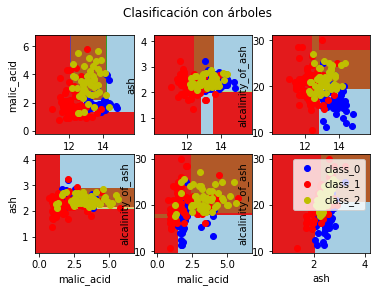

In [ ]:
n_categorias = 3
colores = "bry"
delta = 0.02

for pairidx, pair in enumerate( [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]] ):
  X = datos.data[:,pair]
  y = datos.target

  #arbol = DecisionTreeClassifier().fit(X,y)
  arbol = DecisionTreeClassifier(max_depth=3).fit(X,y)

  plt.subplot(2,3, pairidx + 1)

  x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

  xx, yy = np.meshgrid( np.arange(x_min, x_max, delta), np.arange(y_min, y_max, delta) )

  Z = arbol.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

  plt.xlabel( datos.feature_names[pair[0]] )
  plt.ylabel( datos.feature_names[pair[1]] )
  plt.axis("tight")

  for i, color in zip( range(n_categorias), colores ):
    idx = np.where(y==i)
    plt.scatter(X[idx,0], X[idx,1], c=color, label=datos.target_names[i], cmap=plt.cm.Paired )
  
  plt.axis("tight")


plt.suptitle("Clasificación con árboles")
plt.legend()
plt.show()